# Project 5
Students:
- Donya Roshanzamir
- Abolfazl Soltani

# Create FFT Graphs
An fft graph structured by the following steps:
1. Build a perfect binary tree with the given number of levels $m$.
2. Add $m$ more levels to the tree. At each new level, there are $2^m$ new nodes.
3. In layer $m + i$, we cluster nodes in groups of $2^i$ nodes. Each group is connected to a new node in the next layer.
4. The new nodes in layer $m + i$ are connected to the new nodes in layer $m + i + 1$.

In [57]:
def FFT_Graph(mlg: int) -> tuple[list[int], list[tuple[int, int]]]:
    edges: tuple[int, int] = []
    for i in range(2, 2**(mlg+1)):
        edges.append((i//2, i))

    label = 2 ** mlg
    for j in range(mlg):
        for k in range(2 ** (mlg)):
            edges.append((label + k, (2 ** mlg) + label + k))
            edges.append((label + k, ((label + k) ^ (2 ** j)) + (2**mlg)))
        label += 2 ** mlg

    nodes = [i + 1 for i in range(label + 2 ** mlg - 1)]
    return (nodes, edges)

# Task
There are two types of tasks:
- High Critical: These tasks are critical. They have two execution times, $wcet_low$ and $wcet_high$.
- Low Critical: These tasks are not critical. They have only one execution time, $wcet$.

In [68]:
class Task:
    def __init__(self, id: int, arrival: int, deadline: int, resources: list[int]):
        self.id = id
        self.arrival = arrival
        self.resources = resources

class HC(Task):
    def __init__(self, id: int, arrival: int, deadline: int, resources: list[int], wcet_low: int, wcet_high: int):
        super().__init__(id, arrival, deadline, resources)
        self.wcet_low = wcet_low
        self.wcet_high = wcet_high

class LC(Task):
    def __init__(self, id: int, arrival: int, deadline: int, resources: list[int], wcet: int):
        super().__init__(id, arrival, deadline, resources)
        self.wcet = wcet

# Plot the Dependency Graph
The following code plots the dependency graph of the HC_tasks and LC_tasks.

In [71]:
import networkx
import numpy as np
import matplotlib.pyplot as plt


def show(tasks: list[Task], edges: list[tuple[int, int]], title: str, file_path: str = "sample.svg"):
    g = networkx.DiGraph()
    g.add_nodes_from([nodes.id for nodes in tasks])
    for src, sink in edges:
        g.add_edge(src, sink)

    levels = np.zeros(len(tasks), dtype=int)
    for src, sink in edges:
        if levels[sink - 1] <= levels[src - 1]:
            levels[sink - 1] = levels[src - 1] + 1

    max_level = int(np.max(levels))
    levels_width = np.zeros(max_level + 1, dtype=int)
    for level in levels:
        levels_width[level] += 1

    max_width = max(levels_width)
    layout = networkx.spring_layout(g)
    x_array = np.zeros(max_level + 1, dtype=int)
    for i in range(len(tasks)):
        level = levels[i]
        x: int | None = None
        x = (x_array[level] - ((levels_width[level] - 1) / 2)) * (max_width / levels_width[level]) * 10
        
        layout[i + 1] = (x, -10 * level)
        x_array[level] += 1

    node_attributes = {
        'node_color': 'pink',
        'node_size': 400,
        'font_size': 12,
        'font_color': 'black',
    }
    edge_attributes = {
        'edge_color': 'gray',
        'width': 1,
        'arrows': True,
        'arrowstyle': '-|>',
        'arrowsize': 12,
    }
    plt.figure(figsize=(6, 6))
    networkx.draw_networkx(g, layout, with_labels=True, **node_attributes, **edge_attributes)

    plt.savefig(file_path, format="svg")

    plt.title(title)

    plt.show()

In [72]:
import random as rand
PRIORITY = 10
RESOURCES = 10
PERIOD = 10
EXECUTION_TIME = 10
MAX_ARRIVAL = 100
nodes, edges = FFT_Graph(3)
lc_tasks: list[LC] = []
hc_tasks: list[HC] = []
for i in range(1, len(nodes) + 1):
    resources = rand.sample(range(1, RESOURCES + 1), rand.randint(1, RESOURCES))
    arrival = rand.randint(1, MAX_ARRIVAL)
    deadline = rand.randint(MAX_ARRIVAL, 2 * MAX_ARRIVAL)
    lc_task = LC(i, arrival, deadline, resources, rand.randint(1, EXECUTION_TIME))
    lc_tasks.append(lc_task)

for i in range(1, len(nodes) + 1):
    resources = rand.sample(range(1, RESOURCES + 1), rand.randint(1, RESOURCES))
    arrival = rand.randint(1, MAX_ARRIVAL)
    deadline = rand.randint(MAX_ARRIVAL, 2 * MAX_ARRIVAL)
    hc_task = HC(i, arrival, deadline, resources, rand.randint(1, EXECUTION_TIME), rand.randint(EXECUTION_TIME, 2 * EXECUTION_TIME))
    hc_tasks.append(hc_task)

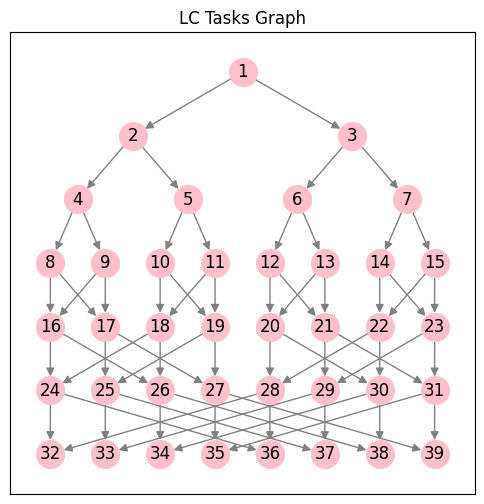

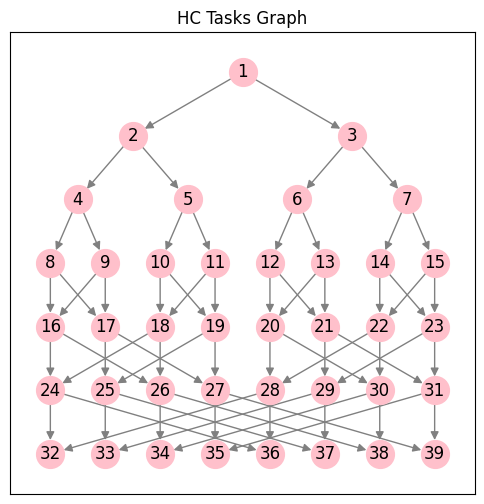

In [73]:
show(lc_tasks, edges, "LC Tasks Graph", "lc.svg")
show(hc_tasks, edges, "HC Tasks Graph", "hc.svg")